In [1]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

import pandas as pd

#(3)
from imblearn.over_sampling import SMOTE

#(4)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_predict

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,RNN,LSTM,Activation,Dropout
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers

#para converter o modelo do tensorflow ara scikitlearn
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_crisis_boe = pd.read_excel('/content/sample_data/Bank_ready.xlsx')

df_crisis_mean = pd.read_excel('/content/sample_data/Mean_ready.xlsx') 

df_crisis_median = pd.read_excel('/content/sample_data/Median_ready.xlsx') 

df_crisis_mostf = pd.read_excel('/content/sample_data/Most_f_ready.xlsx')  

In [4]:
df_crisis_boe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cpi_pdiff2           1249 non-null   float64
 1   bmon_gdp_rdiff2      1249 non-null   float64
 2   stock_pdiff2         1249 non-null   float64
 3   cons_pdiff2          1249 non-null   float64
 4   pdebt_gdp_rdiff2     1249 non-null   float64
 5   inv_gdp_rdiff2       1249 non-null   float64
 6   ca_gdp_rdiff2        1249 non-null   float64
 7   tloan_gdp_rdiff2     1249 non-null   float64
 8   tdbtserv_gdp_rdiff2  1249 non-null   float64
 9   global_loan2         1249 non-null   float64
 10  drate                1249 non-null   float64
 11  crisis               1249 non-null   int64  
 12  crisis_id            1249 non-null   int64  
 13  year                 1249 non-null   int64  
 14  iso                  1249 non-null   object 
dtypes: float64(11), int64(3), object(1)
me

In [5]:
def datapreparation(df_crisis):

  dfx_crisis = df_crisis.drop(['year','iso'],axis=1) #retirar atributos sem relação a crises
  
  dfx_crisis = dfx_crisis.drop(['crisis'],axis=1) #retirar variavel binaria indicadora de crises

  dfy_crisis = df_crisis['crisis'].copy() 
  dfx_crisis.shape, dfy_crisis.shape
  
  dfx_crisis_resampled, dfy_crisis_resampled = SMOTE().fit_resample(dfx_crisis, dfy_crisis)
  dfx_crisis_resampled,dfy_crisis_resampled = shuffle(dfx_crisis_resampled,dfy_crisis_resampled)

  dfx_crisis_resampled = pd.DataFrame(dfx_crisis_resampled)
  dfy_crisis_resampled = pd.DataFrame(dfy_crisis_resampled)
  dfx_crisis_resampled.shape, dfy_crisis_resampled.shape

  dfx_crisis_resampled = dfx_crisis_resampled.to_numpy().reshape(-1, 1, 12)
  dfy_crisis_resampled = dfy_crisis_resampled.to_numpy().astype('float32').reshape((-1,1))

  return dfx_crisis_resampled, dfy_crisis_resampled

In [6]:
dfx_boe, dfy_boe = datapreparation(df_crisis_boe)
dfx_mean, dfy_mean = datapreparation(df_crisis_mean)
dfx_median, dfy_median = datapreparation(df_crisis_median)
dfx_mostf, dfy_mostf = datapreparation(df_crisis_mostf)

#Modelo ajustado para cada dataset

In [7]:
def create_model_boe():
  model = Sequential()
  model.add(LSTM(15,return_sequences=True))
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  model.add(LSTM(3))
  model.add(Activation('relu'))
  model.add(Dense(1))
  model.add(Activation('sigmoid'))
  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
  model.build(dfx_boe.shape)
  #print(model.summary())
  return model

def create_model_mean():
  model = Sequential()
  model.add(LSTM(10,return_sequences=True))
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  model.add(LSTM(3))
  model.add(Activation('relu'))
  model.add(Dense(1))
  model.add(Activation('sigmoid'))
  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
  model.build(dfx_mean.shape)
  #print(model.summary())
  return model

def create_model_median():
  model = Sequential()
  model.add(LSTM(10,return_sequences=True))
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  model.add(LSTM(3))
  model.add(Activation('relu'))
  model.add(Dense(1))
  model.add(Activation('sigmoid'))
  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
  model.build(dfx_median.shape)
 #print(model.summary())
  return model

def create_model_mostf():
  model = Sequential()
  model.add(LSTM(15,return_sequences=True))
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  model.add(LSTM(3))
  model.add(Activation('relu'))
  model.add(Dense(1))
  model.add(Activation('sigmoid'))
  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
  model.build(dfx_mostf.shape)
  #print(model.summary())
  return model

In [8]:
def trainingdata_boe(dfx_crisis,dfy_crisis):

  lstm_scikitlearn =  KerasClassifier(build_fn=create_model_boe, epochs=50, batch_size=20, verbose=0)
  predictions = cross_val_predict(lstm_scikitlearn,dfx_crisis,dfy_crisis,cv=10)

  return predictions

def trainingdata_mean(dfx_crisis,dfy_crisis):

  lstm_scikitlearn =  KerasClassifier(build_fn=create_model_mean, epochs=55, batch_size=20, verbose=0)
  predictions = cross_val_predict(lstm_scikitlearn,dfx_crisis,dfy_crisis,cv=10)

  return predictions

def trainingdata_median(dfx_crisis,dfy_crisis):

  lstm_scikitlearn =  KerasClassifier(build_fn=create_model_median, epochs=55, batch_size=13, verbose=0)
  predictions = cross_val_predict(lstm_scikitlearn,dfx_crisis,dfy_crisis,cv=10)

  return predictions

def trainingdata_mostf(dfx_crisis,dfy_crisis):

  lstm_scikitlearn =  KerasClassifier(build_fn=create_model_mostf, epochs=50, batch_size=10, verbose=0)
  predictions = cross_val_predict(lstm_scikitlearn,dfx_crisis,dfy_crisis,cv=10)

  return predictions

In [9]:
def metrics(dfy,predictions):
# Acurácia Treino
  print("ACC: ",accuracy_score(dfy,predictions)*100)

  print("\n",classification_report(dfy,predictions,zero_division=0))

In [10]:
def cfmatrix(dfy,predictions):
  print("Matriz de Confusão: \n")
  cf = confusion_matrix(dfy,predictions)
  lbl1=['0', '1']
  lbl2 = ['0', '1']
  sns.heatmap(cf,annot=True,cmap="YlOrRd", fmt="d",xticklabels=lbl1,yticklabels=lbl2)

BOE: 

ACC:  71.88041594454073

               precision    recall  f1-score   support

         0.0       0.64      0.99      0.78      1154
         1.0       0.98      0.45      0.61      1154

    accuracy                           0.72      2308
   macro avg       0.81      0.72      0.70      2308
weighted avg       0.81      0.72      0.70      2308

Matriz de Confusão: 



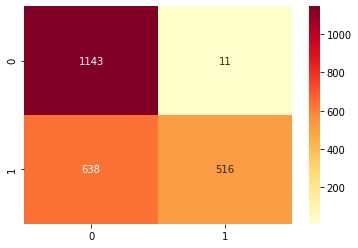

In [11]:
print("BOE: \n")
pred_boe = trainingdata_boe(dfx_boe, dfy_boe)
metrics(dfy_boe,pred_boe)
cfmatrix(dfy_boe,pred_boe)

MEAN: 

ACC:  73.9101274312542

               precision    recall  f1-score   support

         0.0       0.67      0.95      0.79      1491
         1.0       0.92      0.52      0.67      1491

    accuracy                           0.74      2982
   macro avg       0.79      0.74      0.73      2982
weighted avg       0.79      0.74      0.73      2982

Matriz de Confusão: 



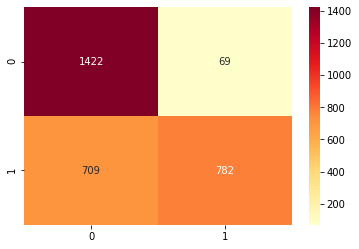

In [12]:
print("MEAN: \n")
pred_mean = trainingdata_mean(dfx_mean, dfy_mean)
metrics(dfy_mean,pred_mean)
cfmatrix(dfy_mean,pred_mean)

MEDIAN: 

ACC:  73.80952380952381

               precision    recall  f1-score   support

         0.0       0.66      0.98      0.79      1491
         1.0       0.96      0.50      0.65      1491

    accuracy                           0.74      2982
   macro avg       0.81      0.74      0.72      2982
weighted avg       0.81      0.74      0.72      2982

Matriz de Confusão: 



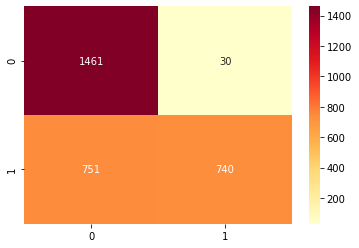

In [13]:
print("MEDIAN: \n")
pred_median = trainingdata_median(dfx_median, dfy_median)
metrics(dfy_median,pred_median)
cfmatrix(dfy_median,pred_median)

MOSTF: 

ACC:  73.07176391683434

               precision    recall  f1-score   support

         0.0       0.65      0.99      0.79      1491
         1.0       0.97      0.48      0.64      1491

    accuracy                           0.73      2982
   macro avg       0.81      0.73      0.71      2982
weighted avg       0.81      0.73      0.71      2982

Matriz de Confusão: 



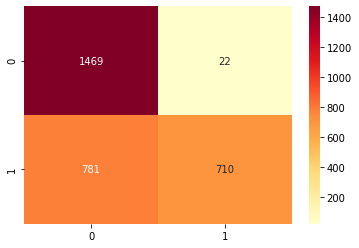

In [14]:
print("MOSTF: \n")
pred_mostf = trainingdata_mostf(dfx_mostf, dfy_mostf)
metrics(dfy_mostf,pred_mostf)
cfmatrix(dfy_mostf,pred_mostf)